### 1. Set-up

In [2]:
# Install Python Sensitivity Analysis  
!pip install sensitivity  


In [1]:
# Defines classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd
# Import in-built module for generating random numbers. 
import random 
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 


•The sensitivity module allows us to conduct a sensitivity analysis in Python. (Later, we’ll use the SensitivityAnalyzer to test how sensitive our model is to a variety of inputs.) 


•The dataclasses module defines classes that will contain and encapsulate data. It takes care of most of the boilerplate (i.e. repeated) code and has basic functionality already implemented, thereby making it easier to create data classes (Besbes 2021). 


•The random module is used to make random numbers, and you should be familiar with both Pandas and Matplotlib.

### 2. Specify inputs

Let’s start by focusing on our inputs and creating:

      •a class to manage the data

       •an instance of the new class that contains the  default inputs.


As we move into more advanced programming and analytics, take your time and make sure you understand each step. Take note of any questions that come up, and remember to add comments to the code snippets that are clear and descriptive – your future self will thank you when you need to review your efforts. Here’s what the code looks like:

In [2]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented programming (OPP):

@dataclass
class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int = 300000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    savings_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1500000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data 


ModelInputs(starting_salary=300000, promos_every_n_years=5, cost_of_living_raise=0.025, promo_raise=0.15, savings_rate=0.2, interest_rate=0.07, desired_cash=1500000)

### 3. Calculate wages

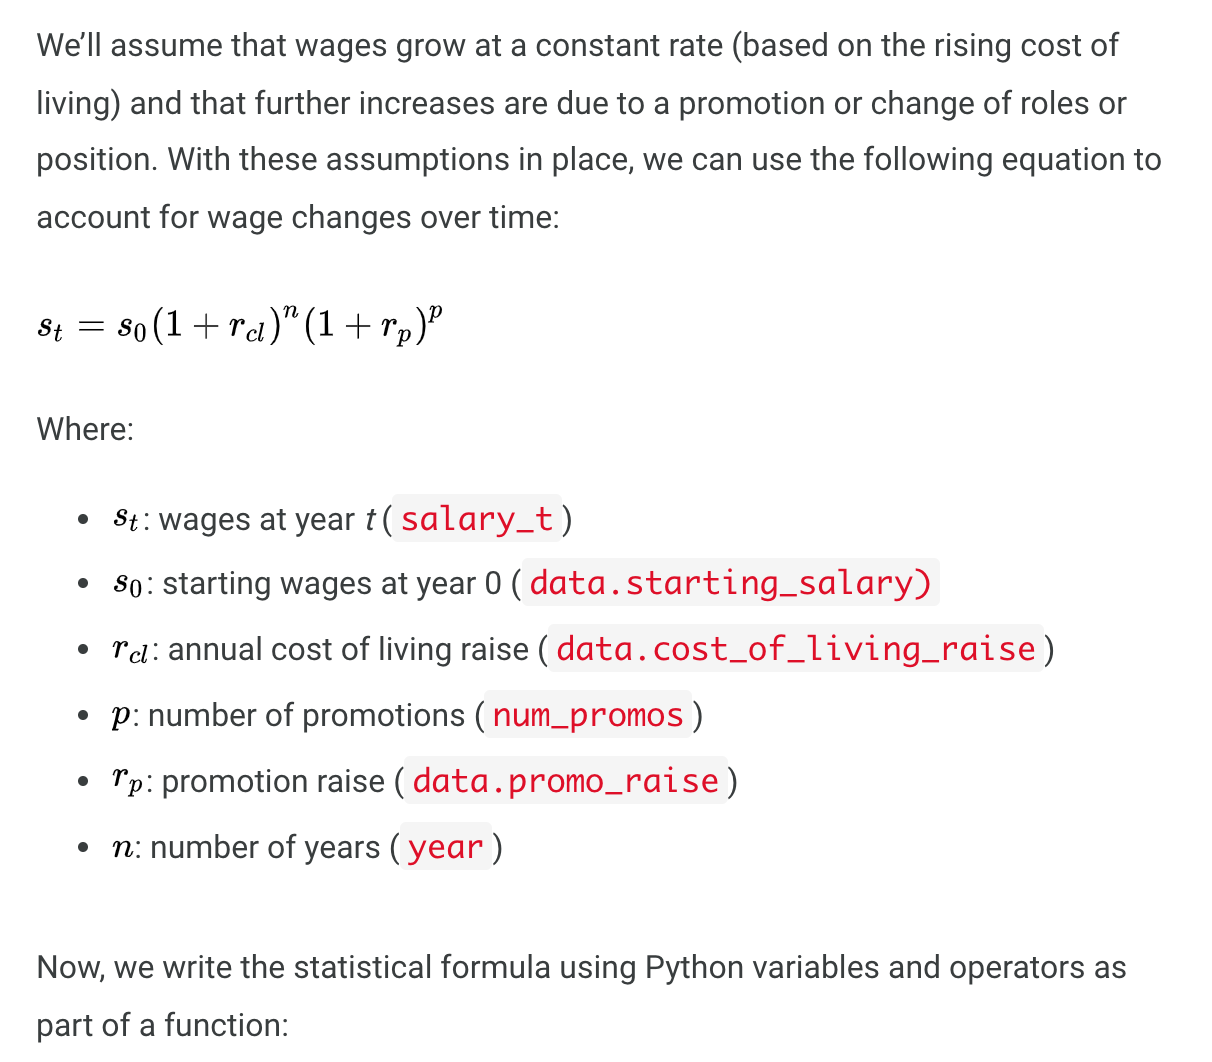

In [3]:
# Get the wage at a given year from the start of the model based 
# on the cost of living raises and regular promotions:

def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)  
    
   # This is the formula above implemented in Python:
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

This gives us the wage in a given year. To get all the wages until retirement, we would need to run the function for each year. However, we don’t know how many years to run, as we don’t know when an individual will retire. (We will get to this when we look at the retirement part of the model.) 

To bypass this, let’s just show the first four salaries. We will use this same function a little later too when we look at wealth.



In [4]:
# Show the first four salaries in the range and 
# print the results using the f-string:

for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is ${salary:,.0f}.')

The wage at year 1 is $307,500.
The wage at year 2 is $315,188.
The wage at year 3 is $323,067.
The wage at year 4 is $331,144.


### 4. Calculate wealth

Here, we will apply the savings rate to the earned salary to calculate cash saved, and then apply a set investment rate to the accumulated wealth. 

This is the equation we’ll use to get the amount of cash saved:

 c_t= s_t * r_s

Where:

 c_t: cash saved during the year t (cash_saved_during_year)
 s_t: wages at year t (salary_t)
 r_s: savings rate (data.savings_rate)
 
In Python, we can run the equation like this:

In [5]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate:


def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

To get wealth for each year would mean applying the investment return to the previous year's wealth, and then adding it to the current year's cash saved. 

The equation would look like this:

w_t = w_t-1\(1+r_j)+c_t

Where:

 w_t: wealth at year t
 r_j: investment rate 
 c_t: cash saved during the year t 
 
Now let’s run the corresponding code in Python.

In [6]:
# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year:

def wealth_year(data: ModelInputs, year, prior_wealth):
                cash_saved = cash_saved_during_year(data, year)
                wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
                return wealth

Great! Now we can now get the output for each year. However, like when we were working with wages earlier, we are unsure of how many years to run the equation for. 

Like we did before, let’s just show the first four years of wealth accumulation.

In [7]:
# Start with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ${wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth

The wealth at year 1 is $61,500.
The wealth at year 2 is $128,842.
The wealth at year 3 is $202,475.
The wealth at year 4 is $282,877.


### 5. Calculate retirement

Retirement is reached when a set amount of cash has been saved – in this instance, over $1.5 million. We managed to find the wages for every year and the accrued yearly wealth. We will use a while loop to run through each year, starting with no cash saved. (Recall 1.2.13 Control flow expressions: Loops.) 

In [8]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is ${wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print:
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

Using the default inputs, let’s see how long it will take to reach over $1.5 million in wealth and retire.

In [9]:
years = years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 is $61,500.
The wealth at year 2 is $128,842.
The wealth at year 3 is $202,475.
The wealth at year 4 is $282,877.
The wealth at year 5 is $380,745.
The wealth at year 6 is $487,417.
The wealth at year 7 is $603,555.
The wealth at year 8 is $729,874.
The wealth at year 9 is $867,136.
The wealth at year 10 is $1,029,411.
The wealth at year 11 is $1,205,583.
The wealth at year 12 is $1,396,691.
The wealth at year 13 is $1,603,844.

Retirement:
It will take 13 years to retire.


### 6. Calculate the years to retirement

In [11]:
# Run the retirement model; collect salary and wealth information year by year
# and store it in a DataFrame for further analysis:

def get_salaries_wealths_df(data):
    prior_wealth = 0   # Start with no cash saved.
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  

    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = wages_year(data, year)
        wealth = wealth_year(data, year, prior_wealth)

         # Set next year's prior wealth to this year's wealth:
        prior_wealth = wealth 

        # Save the results in a tuple for later building the DataFrame:
        df_data_tups.append((year, salary, wealth))
        
    # The while loop has run, so wealth must be >= desired_cash; 
    # Create the DataFrame:
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

### 7. Save the function results in a DataFrame

In [13]:
# format DataFrame for display
get_salaries_wealths_df(model_data)

# Save the function results into the DataFrame
results_df = get_salaries_wealths_df(model_data)

# view the DataFrame
results_df.head()

Year         Salary         Wealth
0     1  307500.000000   61500.000000
1     2  315187.500000  128842.500000
2     3  323067.187500  202474.912500
3     4  331143.867187  282876.929812
4     5  390335.833447  380745.481589

### 8. Create visualisation to show wage or salary change over time

<AxesSubplot:xlabel='Year'>

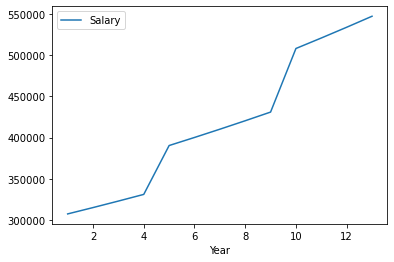

In [14]:
# Visualise wage or salary change over time.
results_df.plot( 'Year' , 'Salary')

<AxesSubplot:xlabel='Year'>

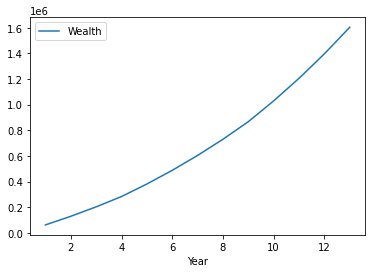

In [15]:
# visualise wealth change over time
results_df.plot( 'Year' , 'Wealth')

## 1.1.10 Running a sensitivity and scenario analysis in Python

### 1. Defining functions for calculating the values for sensitivity analysis

First, however, you need to create a function in Python that accepts individual parameters as opposed to the entire data. 

For this example, we’ll use different inputs than before such that now – as you’ll soon see – it will take the wealth management company’s client 28 years to retire, as opposed to 13.

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# [1] Define the function that accepts the individual parameters rather than the entire data:
def years_to_retirement_separate_args(
    # [2] List the parameters and set their values.
    starting_salary=60000, promos_every_n_years=5, cost_of_living_raise=0.02,
    promo_raise= 0.15, savings_rate=0.25, interest_rate=0.05, desired_cash=1500000):  
    # [3] Update the values of the parameters:
    data = ModelInputs(
        starting_salary=starting_salary, 
        promos_every_n_years=promos_every_n_years, 
        cost_of_living_raise=cost_of_living_raise, 
        promo_raise=promo_raise, 
        savings_rate=savings_rate, 
        interest_rate=interest_rate, 
        desired_cash=desired_cash)
       
    return years_to_retirement(data, print_output=False)

# [4] Call the function.
years_to_retirement_separate_args() 

28

### 2. Generate random values for the input variables using list comprehensions

Now, we can pick values for each input and run them in Python as list comprehensions.

In [19]:
# Use Python’s ‘list comprehensions’ syntax to make it easier to adjust the inputs; 
# Use i (the iterator) as a temporary variable to store the value’s position in the range:

sensitivity_values = {
    'starting_salary': [i * 10000 for i in range(4, 8)],
    'promos_every_n_years': [i for i in range(4, 8)],
    'cost_of_living_raise': [i/100 for i in range(1, 4)],
    'promo_raise': [i/100 for i in range(10, 25, 5)],
    'savings_rate': [i/100 for i in range(10, 50, 10)],
    'interest_rate': [i/100 for i in range(3, 8)],
    'desired_cash': [i * 100000 for i in range(10, 26, 5)]}

Here, i is an iterator that is used when writing loops. (Recall that loops are any calculation that needs to be calculated repeatedly.) i is a temporary variable used to store the integer value of the current position in the range of the for loop, which only has scope within its specific for loop. You could use any other variable name in place of i, such as count or x or number.

The range() function provides a sequence of integers based upon the function's arguments. The start argument is the first value in the range. If range() is called with only one argument, then Python assumes the start = 0.

### 3. Running the sensitivity analyser module

We can now use the SensitivityAnalyzer to run the model using a combination of all the assigned inputs. 

In [20]:
# Run the Python’s SensitivityAnalyzer with the all the assigned inputs:

sa = SensitivityAnalyzer(
    sensitivity_values,
    years_to_retirement_separate_args,
    result_name='Years to Retirement',
    reverse_colors=True,
    grid_size=3)

100%|████████████████████████████████████| 11520/11520 [00:12<00:00, 894.32it/s]


### 4. Displaying the results

Now we can display the results using a DataFrame.

In [21]:
# Display the results using a DataFrame.
styled_dict = sa.styled_dfs(num_fmt='{:.1f}') 

# Scenario analysis

Recall that what-if analysis scenarios are typically constructed to fit into three categories:

##### Best case: When savings_rate, promo_raise, cost_of_living_raise, etc. are all higher compared to the base case

##### Base case: When all the values are considered as normal (original input)

##### Worst case: When savings_rate, promo_raise, cost_of_living_raise, etc. are all lower compared to the base case

Let’s consider a scenario for each of these categories to plug into our model. An influence on retirement age could be the nature of the economy as a whole. For a best-case scenario, let’s use a strong or good economy. For the worst case, let’s do the opposite and use a weak or bad economy. Let’s keep our base case as our original inputs. 

What we are doing here is working around the question: How long would it take to retire if:

• the economy is good (e.g. savings_rate rises)

• the economy is normal (i.e. neither good nor bad)

• the economy is bad (e.g. savings_rate falls

We already have the inputs for the 'normal economy', but in order to run the model, we need to be able to compare the results from each of the three economic scenarios. So, first, we first need to set the values for a 'good' and 'bad' economy respectively. For this example, we'll use reasonable estimates across each of the categories in our model.

#### 1. set the values for good and bad economies as we already have normal

In [22]:
#  The function to calculate ‘bad’ economy:
bad_economy_data = ModelInputs(
    starting_salary=100000,
    promos_every_n_years=8,
    cost_of_living_raise=0.01,
    promo_raise=0.07,
    savings_rate=0.15,
    interest_rate=0.03)


# The function for ‘good’ economy:
good_economy_data = ModelInputs(
    starting_salary=500000,
    promos_every_n_years=4,
    cost_of_living_raise=0.03,
    promo_raise=0.20,
    savings_rate=0.35,
    interest_rate=0.06)

cases = {
    'Bad': bad_economy_data,
    'Normal': model_data, # Original inputs were set to assume a ‘normal’ economy
    'Good': good_economy_data}

#### 2. Run the model for each of the three scenarios

In [23]:
# Run the model with the three scenarios and print the results (with a text string):
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    print(f'It would take {ytr} years to retire in a {case_type} economy.')

It would take 40 years to retire in a Bad economy.
It would take 13 years to retire in a Normal economy.
It would take 7 years to retire in a Good economy.


# Assigning probabilities

Bear in mind that our good, base, and bad economies are essentially assumptions we are making. If we tell the client that they can retire in 61 years’ time (an unenviable task for a financial manager!), we are assuming that the future economy will be weak and stay weak. As we know, assumptions are not failsafe, so we can assign odds or probabilities of each scenario occurring in our model. Doing so would give us new years-to-retirement figures.

Let’s first assign probabilities to our good, base, and bad economy scenarios. 

In [24]:
# Note: These values are arbitrary (i.e. they have been randomly allocated) and are only used for demonstration. 

case_probabilities = {
    'Bad': 0.2,
    'Normal': 0.5,
    'Good': 0.3}

Here we are saying that there is a 20% chance of a bad economy, a 50% chance of a normal economy, and a 30% chance of a good economy in the future. 

In [25]:
# Run the model by taking the expected value over the three cases;
# print the results with a text string:

expected_ytr = 0
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    weighted_ytr = ytr * case_probabilities[case_type]
    expected_ytr += weighted_ytr

    
    print(f'It would take {expected_ytr:.0f} years to retire given a \
    {case_probabilities["Bad"]:.0%} \
    chance of a bad economy and {case_probabilities["Good"]:.0%} \
    chance of a good economy.')

It would take 8 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.
It would take 14 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.
It would take 17 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.




Considering the scenario analysis, we should expect that it takes a few years longer to retire than in the baseline case, as saving and investment opportunities and rates are lower in bad economies.